In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

In [2]:
# Loading the data from csv files
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('valid.csv', sep=';')
train.head() # Prints just the first 5 rows of the data

label          F1           F2           F3          B1         B2  \
0     a  577.711176  1095.164676  2396.961524  104.933115  51.205184   
1     a  680.221977  1139.416164  2518.026269  114.348519  63.903388   
2     a  689.520882  1139.416164  2519.049259  153.883774  79.307646   
3     a  689.520882  1139.416164  2519.049259  153.883774  71.966616   
4     a  709.068261  1139.182144  2520.772190  157.132822  79.307646   

          B3  
0  82.386797  
1  82.386797  
2  82.386797  
3  78.705949  
4  68.074213

In [52]:
# Map labels ['a', 'e', 'i', 'o', 'u'] to int
lab_to_int = {'a': 0, 'e': 1, 'i': 2, 'o': 3, 'u': 4}
int_to_lab = {value: key for key, value in lab_to_int.items()}
train['label'] = train['label'].map(lab_to_int)
test['label'] = test['label'].map(lab_to_int)

In [5]:
# List of feature names
features = ['F1', 'F2', 'F3', 'B1', 'B2', 'B3']

# Get pandas dataframes to numpy arrays of data
x_train = train[features].values
x_test = test[features].values

# Also convert the int labels to categorical e.g. 1 = [0,1,0,0,0]
y_train = to_categorical(train['label'].values, num_classes=5)
y_test = to_categorical(test['label'].values, num_classes=5)

In [9]:
print('Shape of train x:', x_train.shape)
print('Shape of train y:', y_train.shape)
print('Shape of test  x:', x_test.shape)
print('Shape of test  y:', y_test.shape)

Shape of train x: (1587, 6)
Shape of train y: (1587, 5)
Shape of test  x: (45, 6)
Shape of test  y: (45, 5)


In [32]:
# Build the model architecture (the hypothesis)
# Aim is to build a model, that can predict Y based on input X.

inputs = Input(shape=(6,))

a = Dense(16, kernel_initializer='glorot_uniform')(inputs)
a = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True)(a)
a = Activation('relu')(a)
a = Dropout(0.2)(a)

a = Dense(16, kernel_initializer='glorot_uniform')(a)
a = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True)(a)
a = Activation('relu')(a)
a = Dropout(0.2)(a)

outputs = Dense(5, activation='softmax')(a)
model = Model(inputs, outputs)

In [33]:
# Display the details of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                112       
_________________________________________________________________
batch_normalization_7 (Batch (None, 16)                64        
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_8 (Batch (None, 16)                64        
__________

In [34]:
# Set desired optimizer and loss function and compile
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Train the model
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=128,
                    epochs=512,
                    verbose=2,
                    shuffle=True,
                    initial_epoch=0,
                    validation_data=(x_test, y_test))

Train on 1587 samples, validate on 45 samples
Epoch 1/512
 - 1s - loss: 1.7440 - val_loss: 1.7034
Epoch 2/512
 - 0s - loss: 1.5537 - val_loss: 1.4759
Epoch 3/512
 - 0s - loss: 1.3655 - val_loss: 1.3343
Epoch 4/512
 - 0s - loss: 1.2350 - val_loss: 1.2260
Epoch 5/512
 - 0s - loss: 1.1229 - val_loss: 1.1701
Epoch 6/512
 - 0s - loss: 1.0390 - val_loss: 1.1391
Epoch 7/512
 - 0s - loss: 0.9617 - val_loss: 1.1233
Epoch 8/512
 - 0s - loss: 0.8690 - val_loss: 1.1070
Epoch 9/512
 - 0s - loss: 0.8221 - val_loss: 1.1061
Epoch 10/512
 - 0s - loss: 0.7633 - val_loss: 1.0839
Epoch 11/512
 - 0s - loss: 0.7175 - val_loss: 1.0139
Epoch 12/512
 - 0s - loss: 0.6691 - val_loss: 0.9740
Epoch 13/512
 - 0s - loss: 0.6344 - val_loss: 0.9258
Epoch 14/512
 - 0s - loss: 0.5879 - val_loss: 0.8760
Epoch 15/512
 - 0s - loss: 0.5409 - val_loss: 0.8014
Epoch 16/512
 - 0s - loss: 0.5144 - val_loss: 0.7324
Epoch 17/512
 - 0s - loss: 0.5029 - val_loss: 0.6982
Epoch 18/512
 - 0s - loss: 0.4667 - val_loss: 0.6608
Epoch 19/

Epoch 154/512
 - 0s - loss: 0.0557 - val_loss: 0.0046
Epoch 155/512
 - 0s - loss: 0.0421 - val_loss: 0.0023
Epoch 156/512
 - 0s - loss: 0.0405 - val_loss: 0.0024
Epoch 157/512
 - 0s - loss: 0.0396 - val_loss: 0.0016
Epoch 158/512
 - 0s - loss: 0.0411 - val_loss: 0.0012
Epoch 159/512
 - 0s - loss: 0.0436 - val_loss: 0.0020
Epoch 160/512
 - 0s - loss: 0.0350 - val_loss: 0.0045
Epoch 161/512
 - 0s - loss: 0.0481 - val_loss: 0.0015
Epoch 162/512
 - 0s - loss: 0.0387 - val_loss: 0.0018
Epoch 163/512
 - 0s - loss: 0.0289 - val_loss: 0.0016
Epoch 164/512
 - 0s - loss: 0.0371 - val_loss: 0.0012
Epoch 165/512
 - 0s - loss: 0.0483 - val_loss: 0.0037
Epoch 166/512
 - 0s - loss: 0.0411 - val_loss: 0.0026
Epoch 167/512
 - 0s - loss: 0.0442 - val_loss: 0.0012
Epoch 168/512
 - 0s - loss: 0.0430 - val_loss: 0.0019
Epoch 169/512
 - 0s - loss: 0.0395 - val_loss: 0.0014
Epoch 170/512
 - 0s - loss: 0.0408 - val_loss: 7.7919e-04
Epoch 171/512
 - 0s - loss: 0.0386 - val_loss: 7.1342e-04
Epoch 172/512
 - 0s 

Epoch 298/512
 - 0s - loss: 0.0292 - val_loss: 4.0010e-04
Epoch 299/512
 - 0s - loss: 0.0221 - val_loss: 3.7999e-04
Epoch 300/512
 - 0s - loss: 0.0195 - val_loss: 6.7594e-04
Epoch 301/512
 - 0s - loss: 0.0241 - val_loss: 0.0018
Epoch 302/512
 - 0s - loss: 0.0242 - val_loss: 8.4795e-04
Epoch 303/512
 - 0s - loss: 0.0150 - val_loss: 0.0259
Epoch 304/512
 - 0s - loss: 0.0274 - val_loss: 0.0260
Epoch 305/512
 - 0s - loss: 0.0393 - val_loss: 3.7882e-04
Epoch 306/512
 - 0s - loss: 0.0259 - val_loss: 2.0719e-04
Epoch 307/512
 - 0s - loss: 0.0375 - val_loss: 2.5992e-04
Epoch 308/512
 - 0s - loss: 0.0328 - val_loss: 6.8998e-04
Epoch 309/512
 - 0s - loss: 0.0290 - val_loss: 6.9373e-04
Epoch 310/512
 - 0s - loss: 0.0214 - val_loss: 3.0619e-04
Epoch 311/512
 - 0s - loss: 0.0283 - val_loss: 2.8160e-04
Epoch 312/512
 - 0s - loss: 0.0322 - val_loss: 2.5787e-04
Epoch 313/512
 - 0s - loss: 0.0242 - val_loss: 1.6633e-04
Epoch 314/512
 - 0s - loss: 0.0212 - val_loss: 1.8440e-04
Epoch 315/512
 - 0s - loss

 - 0s - loss: 0.0151 - val_loss: 6.4653e-05
Epoch 441/512
 - 0s - loss: 0.0136 - val_loss: 6.8032e-05
Epoch 442/512
 - 0s - loss: 0.0236 - val_loss: 8.3100e-05
Epoch 443/512
 - 0s - loss: 0.0215 - val_loss: 1.1572e-04
Epoch 444/512
 - 0s - loss: 0.0105 - val_loss: 9.6294e-05
Epoch 445/512
 - 0s - loss: 0.0132 - val_loss: 1.0197e-04
Epoch 446/512
 - 0s - loss: 0.0177 - val_loss: 9.1198e-05
Epoch 447/512
 - 0s - loss: 0.0218 - val_loss: 7.7205e-05
Epoch 448/512
 - 0s - loss: 0.0120 - val_loss: 6.7270e-05
Epoch 449/512
 - 0s - loss: 0.0142 - val_loss: 6.6814e-05
Epoch 450/512
 - 0s - loss: 0.0210 - val_loss: 7.5955e-05
Epoch 451/512
 - 0s - loss: 0.0110 - val_loss: 1.0656e-04
Epoch 452/512
 - 0s - loss: 0.0158 - val_loss: 9.7212e-05
Epoch 453/512
 - 0s - loss: 0.0222 - val_loss: 1.0717e-04
Epoch 454/512
 - 0s - loss: 0.0227 - val_loss: 6.4934e-04
Epoch 455/512
 - 0s - loss: 0.0173 - val_loss: 5.8501e-04
Epoch 456/512
 - 0s - loss: 0.0140 - val_loss: 2.1469e-04
Epoch 457/512
 - 0s - loss: 

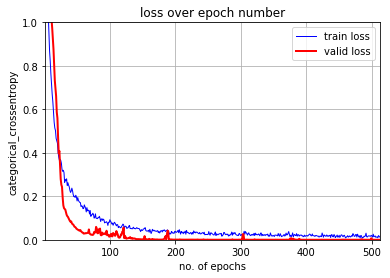

In [82]:
def plot_tvh(tvh, metric='loss', lossfunc='mae', maxy=1.0):
    tvh = tvh.history

    # Plot metric over number of epochs
    val_metric = 'val_{}'.format(metric)
    train_Yaxis = tvh[metric]
    valid_Yaxis = tvh[val_metric]
    epoch_Xaxis = list(range(1, len(tvh[metric]) + 1))
    fig, ax = plt.subplots(1, 1)

    plt.plot(epoch_Xaxis, train_Yaxis, 'b-', label='train {}'.format(metric), linewidth=1.0)
    plt.plot(epoch_Xaxis, valid_Yaxis, 'r-', label='valid {}'.format(metric,), linewidth=2.0)
    plt.ylabel(lossfunc)
    plt.xlabel('no. of epochs')
    plt.legend(loc='upper right')
    plt.axis([1, len(tvh[metric]), 0, maxy])
    plt.title('{0} over epoch number'.format(metric))
    plt.grid(True)
    plt.show()
    plt.close()

plot_tvh(history, metric='loss', lossfunc='categorical_crossentropy')

In [83]:
# Print classification report for test data
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print('Classification report: \n')
print(classification_report(y_true, y_pred))

Classification report: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         9
          3       1.00      1.00      1.00         9
          4       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        45



In [84]:
# Evaluate the performance of the trained model
model.evaluate(x_test, y_test) # Prints the value of loss

45/45 [==============================] - 0s 74us/step


0.00015433039512168358

In [85]:
# Use the trained model to get predictions on new data
my_vowel_a = np.array([[678.0304751, 1229.78973, 2637.794527, 161.7291536, 91.99675873, 72.93666034]])
pred = model.predict(my_vowel_a)
print('Getting predictions for new vowel of class "a":')
print(pred)
print('Predicted int representation: ', pred.argmax())
print('Predicted class: ', int_to_lab[pred.argmax()])

Getting predictions for new vowel of class "a":
[[1.0000000e+00 1.9794521e-21 2.8947287e-18 7.5863119e-20 3.0165069e-22]]
Predicted int representation:  0
Predicted class:  a
